In [7]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
%autoreload
%matplotlib inline

import numpy as np
import darkhistory.physics as phys
import darkhistory.utilities as utils
from darkhistory.spec.spectrum import Spectrum
from darkhistory.spec.spectra import Spectra
import darkhistory.spec.spectools as spectools
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10,10]

from scipy import integrate

# Rebinning and Redshifting

In [12]:
eng_test = np.array([0.1, 1.2, 36.54, 230.122, 510])
test = Spectrum(eng_test, np.array([10., 15.2, 16.7, 1302.29, 0.1]), 1000.)
init_toteng = test.toteng()
print('initial total N: ', test.totN())
print('initial total eng: ', test.toteng())
print('initial abscissa: ', test.eng)
print('initial dN/dE: ', test.dNdE)
print('initial N in each bin: ', test.totN('bin', np.arange(6)))
print('initial eng in each bin: ', test.toteng('bin', np.array([0,1,2,3,4])))
test.rebin(np.array([0.3, 5, 50, 210.4, 300.1, 356.4, 480.5, 1023.4, 2084.5, 2085.1, 2894.102, 3050]))
test.rebin(np.array([0.1, 0.52, 5, 210.4, 1203.44, 4012]))
print('************************ After Rebinning Twice **********************************')
print('final total N: ', test.totN())
print('final total eng: ', test.toteng())
print('final total eng/initial total eng: ', test.toteng()/init_toteng)
print('final abscissa: ', test.eng)
print('final dN/dE: ', test.dNdE)
print('final N in each bin: ', test.totN('bin', np.arange(6)))
print('final eng in each bin: ', test.toteng('bin', np.arange(6)))
print('N underflow: ', test.underflow['N'])
print('eng underflow: ', test.underflow['eng'])
print('*********************Redshift from 1000 to 5.57958*************************************')
test.redshift(5.57958)
print('final total N: ', test.totN())
print('final total eng: ', test.toteng())
print('final total eng/initial total eng: ', test.toteng()/init_toteng)
print('final abscissa: ', test.eng)
print('final dN/dE: ', test.dNdE)
print('final N in each bin: ', test.totN('bin', np.arange(6)))
print('final eng in each bin: ', test.toteng('bin', np.arange(6)))
print('N underflow: ', test.underflow['N'])
print('eng underflow: ', test.underflow['eng'])
print('**************************Redshift from 5.57958 to 2.975********************************')
test.redshift(2.975)
print('final total N: ', test.totN())
print('final total eng: ', test.toteng())
print('final total eng/initial total eng: ', test.toteng()/init_toteng)
print('final abscissa: ', test.eng)
print('final dN/dE: ', test.dNdE)
print('final N in each bin: ', test.totN('bin', np.arange(6)))
print('final eng in each bin: ', test.toteng('bin', np.arange(6)))
print('N underflow: ', test.underflow['N'])
print('eng underflow: ', test.underflow['eng'])

initial total N:  396686.697945
initial total eng:  90974348.553
initial abscissa:  [  1.00000000e-01   1.20000000e+00   3.65400000e+01   2.30122000e+02
   5.10000000e+02]
initial dN/dE:  [  1.00000000e+01   1.52000000e+01   1.67000000e+01   1.30229000e+03
   1.00000000e-01]
initial N in each bin:  [  2.48490665e+00   5.38170529e+01   1.60374079e+03   3.94986069e+05
   4.05858573e+01]
initial eng in each bin:  [  2.48490665e-01   6.45804635e+01   5.86006884e+04   9.08949842e+07]
************************ After Rebinning Twice **********************************
final total N:  396686.697945
final total eng:  90974348.553
final total eng/initial total eng:  1.0
final abscissa:  [  1.00000000e-01   5.20000000e-01   5.00000000e+00   2.10400000e+02
   1.20344000e+03   4.01200000e+03]
final dN/dE:  [ 140.54035226   20.7092487    91.14107415  671.58969661    4.42910864
    0.        ]
final N in each bin:  [  2.31703064e+01   2.10639149e+01   1.36778530e+03   3.87416158e+05
   7.85675782e+03]


# Shifting Energies

In [17]:
eng_test = np.array([36.54, 230.122, 510, 2000, 5040])
dNdE_test = np.array([10., 15.2, 16.7, 1302.29, 0.1])
bin_width_test = np.diff(np.log(spectools.get_bin_bound(eng_test)))
test = Spectrum(eng_test, dNdE_test, 1000.)
a = eng_test-10
bin_width_new = np.diff(np.log(spectools.get_bin_bound(a)))
print(test.eng)
print(test.dNdE)
print(test.totN())
print(test.totN('bin',np.arange(a.size+1)))
print(test.toteng())
toteng_before = test.toteng()
test.shift_eng(a)
print(test.eng)
print(test.dNdE)
print(test.totN())
print(test.totN('bin',np.arange(a.size+1)))
print(test.toteng())
toteng_after = test.toteng()

print(toteng_before - toteng_after)
print(10*test.totN())

[   36.54    230.122   510.     2000.     5040.   ]
[  1.00000000e+01   1.52000000e+01   1.67000000e+01   1.30229000e+03
   1.00000000e-01]
2998178.183
[  6.72409830e+02   4.61017765e+03   9.20812413e+03   2.98322164e+06
   4.65826486e+02]
5974572671.77
[   26.54    220.122   500.     1990.     5030.   ]
[  1.19760657e+01   1.42670703e+01   1.67290562e+01   1.29873315e+03
   9.98717815e-02]
2998178.183
[  6.72409830e+02   4.61017765e+03   9.20812413e+03   2.98322164e+06
   4.65826486e+02]
5944590889.94
29981781.83
29981781.83


# Discretization

Abscissa:  [  0.03162278   0.03981072   0.05011872   0.06309573   0.07943282   0.1
   0.12589254   0.15848932   0.19952623   0.25118864   0.31622777
   0.39810717   0.50118723   0.63095734   0.79432823   1.           1.25892541
   1.58489319   1.99526231   2.51188643   3.16227766   3.98107171
   5.01187234   6.30957344   7.94328235  10.          12.58925412
  15.84893192  19.95262315  25.11886432]
Exact dn/dE spectrum:  [  6.18936659e+11   7.77062904e+11   9.74891951e+11   1.22198550e+12
   1.52996781e+12   1.91282487e+12   2.38715075e+12   2.97225753e+12
   3.69001052e+12   4.56416678e+12   5.61887674e+12   6.87584847e+12
   8.34948185e+12   1.00390963e+13   1.19173217e+13   1.39140761e+13
   1.58968656e+13   1.76513605e+13   1.88725175e+13   1.91862593e+13
   1.82307807e+13   1.58194162e+13   1.21535924e+13   7.94057576e+12
   4.19283808e+12   1.68034075e+12   4.73452954e+11   8.53918191e+10
   8.77537113e+09   4.44104087e+08]
Discretized dN/dE spectrum:  [  3.77673152e+11   7.975809

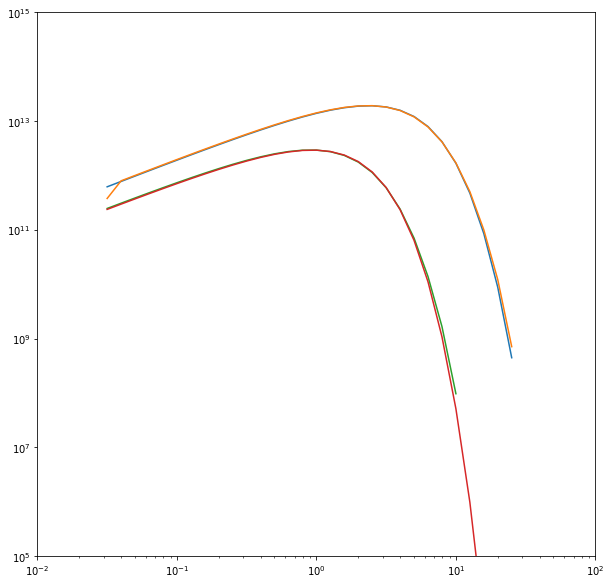

In [18]:
T_start = 1.5
T_end = 0.586
fac = T_start/T_end

def CMB_dndE_start(eng):
    return phys.CMB_spec(eng,T_start)

def CMB_dndE_end(eng):
    return phys.CMB_spec(eng,T_end)

def CMB_EdndE_start(eng):
    return eng*phys.CMB_spec(eng,T_start)

def CMB_EdndE_end(eng):
    return eng*phys.CMB_spec(eng,T_end)

eng = 10**((np.arange(30)-15)*(1/10))
# eng = np.array([0.2, 0.68, 1.2, 2.55, 3.7, 10, 100])
print("Abscissa: ", eng)
print("Exact dn/dE spectrum: ", CMB_dndE_start(eng))

discrete_CMB = spectools.discretize(CMB_dndE_start, eng)
print("Discretized dN/dE spectrum: ", discrete_CMB.dNdE)
plt.loglog(eng, CMB_dndE_start(eng))
plt.loglog(discrete_CMB.eng, discrete_CMB.dNdE)

print("Exact total number in spectrum: ", integrate.quad(CMB_dndE_start, eng[0], eng[-1])[0])
print("Exact total energy in spectrum: ", integrate.quad(CMB_EdndE_start, eng[0], eng[-1])[0])
print("Total number in discretized spectrum: ", discrete_CMB.totN())
print("Total energy in discretized spectrum: ", discrete_CMB.toteng())
print("Ratio of total number: ", integrate.quad(CMB_dndE_start, eng[0], eng[-1])[0]/discrete_CMB.totN())
print("Ratio of total energy: ", integrate.quad(CMB_EdndE_start, eng[0], eng[-1])[0]/discrete_CMB.toteng())

print("Redshifting the discrete spectrum from T_start = ",T_start," eV to T_end = ",T_end," eV.")
discrete_CMB.rs = 4000
discrete_CMB.redshift(4000/fac)
# The CMB spectrum is given per volume, so there's an additional factor of 4^3 to make the comparison.
plt.loglog(discrete_CMB.eng, discrete_CMB.dNdE/fac**3)
plt.loglog(eng, CMB_dndE_end(eng))
plt.axis([10**-2, 10**2, 10**5, 10**15])

print("Ratio of total number in the analytic, redshifted spectrum to the redshifted discrete spectrum: ")
print(integrate.quad(CMB_dndE_end, eng[0]/fac, eng[-1]/fac)[0]/(discrete_CMB.totN()/fac**3))
print("Ratio of total energy in the analytic, redshifted spectrum to the redshifted discrete spectrum: ")
print(integrate.quad(CMB_EdndE_end, eng[0]/fac, eng[-1]/fac)[0]/(discrete_CMB.toteng()/fac**3))

# Spectra

In [28]:
eng = np.array([200, 400, 600, 800, 1000])
rs = np.array([50, 40, 30, 20, 10])

rand_dNdE = list(map(np.array,[[1,1,1,1,1],[2,2,2,2,2],[3,3,3,3,3], 
             [4,4,4,4,4],[5,5,5,5,5]]))

spec_list = [Spectrum(eng, rand_dNdE[i], rs[i]) for i in np.arange(5)]

test_spectra = Spectra(spec_list)
print(test_spectra.sum_specs(np.array([1,1/2,1/3,1/4,1/5])))
print(test_spectra.integrate_each_spec(np.array([1,1/2,1/4,1/8,1/16])))

[ 5.  5.  5.  5.  5.]
[ 1.9375  3.875   5.8125  7.75    9.6875]


(0, 6)

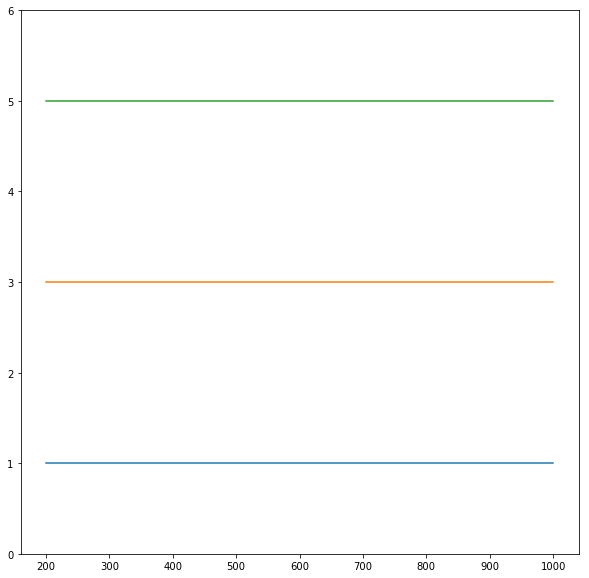

In [29]:
test_spectra.plot((0,5),2)
plt.ylim(0,6)